# Analiza i Przetwarzanie Obrazów - Sprawozdanie 1 - Aleksander Kluczka

## Laboratorium 2 - Reprezentacja obrazu i koloru

### a) Proszę wczytać przykładowy obraz

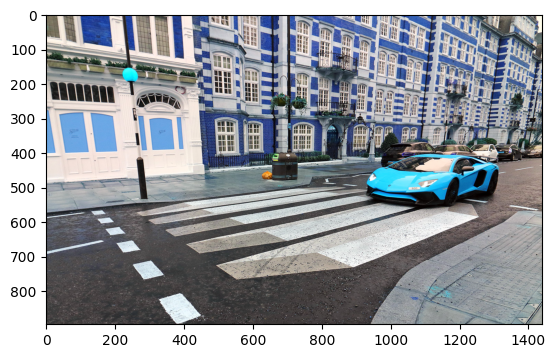

In [1]:
import cv2
from matplotlib import pyplot

image = cv2.imread("res/lab2.jpg")
pyplot.imshow(image)

### b) Dokonaj konwersji obrazu do skali szarości.

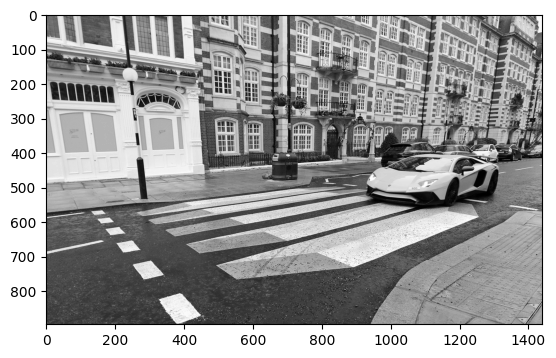

In [2]:
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
pyplot.imshow(image_grey, "gray")

**Dlaczego wynikowy obraz nie jest tworzony po prostu przez dodanie składowych R+G+B z wagą?**

Ludzkie oko widzi kolory z różną czułością, przykładowo kolory zielone i żółte są dla nas intensywniejsze. Dodanie składowych R, G i B do siebie z różnymi wagami powodowałoby, że niektóre piksele sumarycznie byłyby zbyt ciemne, a inne zbyt jasne (wartości wykraczałyby poza zakres [0-1]). Zamiast tego wykoprzystywany jest model YUV, który bardziej odpowiada preferencjom ludzkiego oka.


### c) Proszę rozdzielić składowe RGB obrazu i wyświetlić trzy obrazy w skali szarości odpowiadające intensywności pierwotnego obrazu osobno w składowych R, G i B.

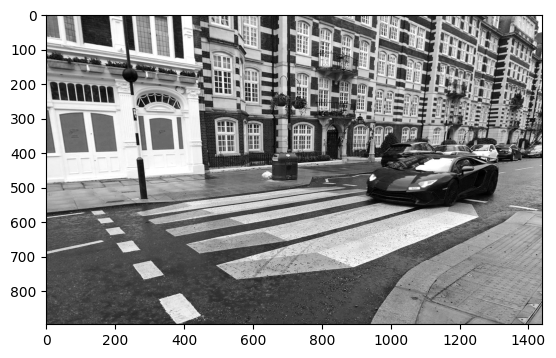

In [3]:
b, g, r = cv2.split(image)
pyplot.imshow(b, "gray")

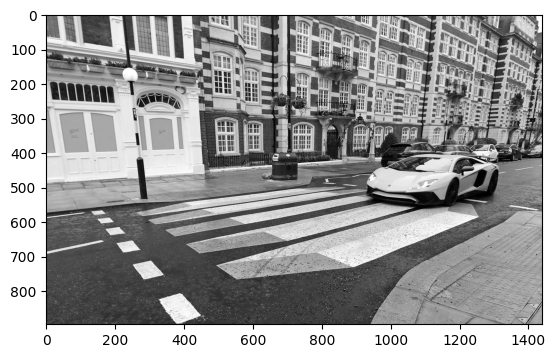

In [4]:
pyplot.imshow(g, "gray")

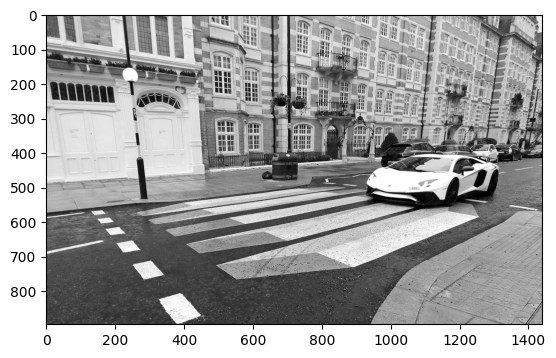

In [5]:
pyplot.imshow(r, "gray")

### d) Dokonaj konwersji obrazu do skali HSV i wyświetl trzy obrazy w skali szarości odpowiadające intensywności pierwotnego obrazu osobno w składowych H, S i V.

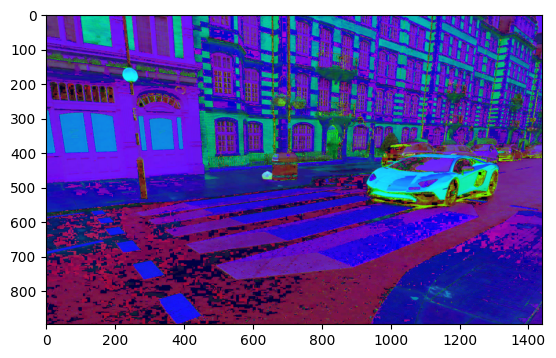

In [6]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(image_hsv)
pyplot.imshow(image_hsv)

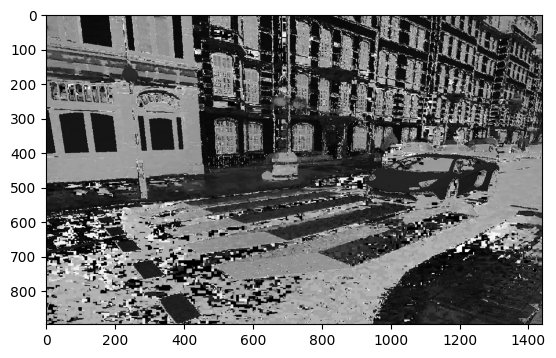

In [7]:
pyplot.imshow(h, "gray")

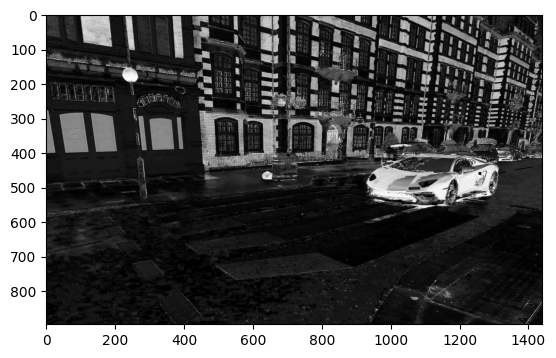

In [8]:
pyplot.imshow(s, "gray")

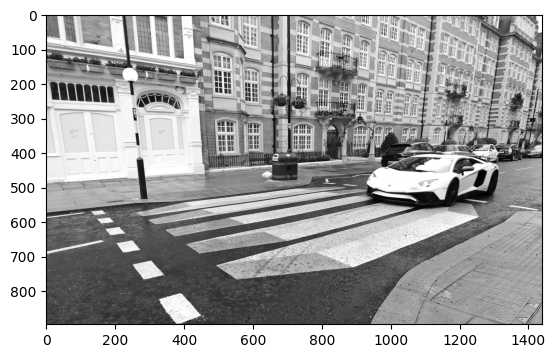

In [9]:
pyplot.imshow(v, "gray")


### e) Stwórz obraz, na którym widoczny będzie jedynie żółty samochód (*to cenne ćwiczenie w zagadnieniach śledzenia obiektów*).

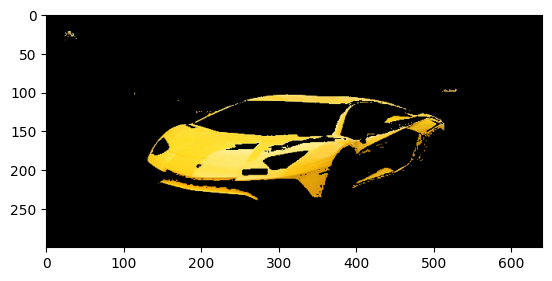

In [10]:
image_car = cv2.inRange(image_hsv, (20, 100, 160), (36, 255, 255))
image_yellow = cv2.bitwise_and(image, image, mask=image_car)
image_yellow = image_yellow[300:600, 800:1500][
    :, :, ::-1
]  # obciecie zdjecia + konwersja z bgr do rgb
pyplot.imshow(image_yellow)

**Realizujemy to w skali HSV- dlaczego?**

Ze względu na odpowiadające nam temu zastosowaniu składowe hue, saturation, value. Dzięki odcieniowi (hue), możemy jednoznacznie wybrać zbliżony zakres koloru, który chcemy wyodrębnić. Podobnie pozostałe parametry - nasycenie (stauration) oraz jasność (value) - dobieramy wartości charakteryzujące docelowy obiekt, czyli w tym wypadku samochód.

Dodatkowo, HSV przydaje się przy nakładaniu maski, ponieważ dany piksel można po prostu "wyłączyć" ustawiając wartość value na 0.

### f) Proszę narysować histogram obrazu dla trzech składowych R,G,B.

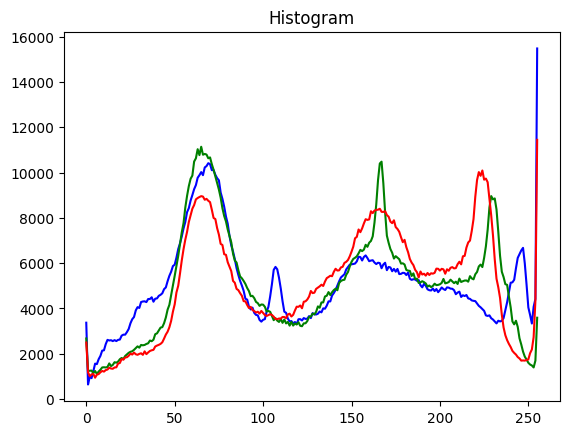

In [11]:
for i, col in enumerate(["b", "g", "r"]):
    hist_all = cv2.calcHist(
        images=[image],
        channels=[i],
        mask=None,
        histSize=[256],
        ranges=[0, 256],
    )
    pyplot.plot(hist_all, color=col)
pyplot.title("Histogram")
pyplot.show()

### g) Proszę zrealizować rozciąganie kontrastu i wyrównanie histogramu – dla obrazu zapisanego w skali szarości.

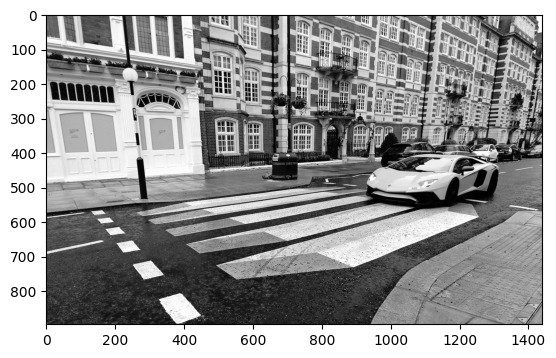

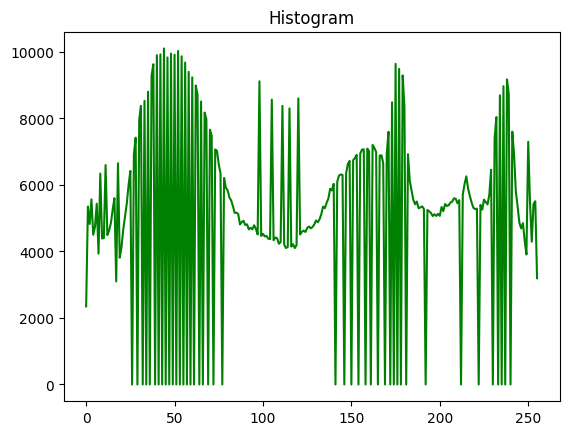

In [12]:
# wyrownanie histogramu
image_eq = cv2.equalizeHist(image_grey)
pyplot.imshow(image_eq, "gray")

pyplot.figure()
for i, col in enumerate(["g"]):
    hist_all = cv2.calcHist(
        images=[image_eq],
        channels=[i],
        mask=None,
        histSize=[256],
        ranges=[0, 256],
    )
    pyplot.plot(hist_all, color=col)
pyplot.title("Histogram")
pyplot.show()

In [13]:
# rozciaganie kontrastu
import numpy as np
minc = np.min(image_grey)
maxc = np.max(image_grey)

print(f"Min={minc}, Max={maxc} => rozciaganie nic nie da, bo zakres 0-255")

Min=0, Max=255 => rozciaganie nic nie da, bo zakres 0-255


**Czym różni się wynik tych dwóch operacji?**

Wyrównanie histogramu ma na celu znormalizować jaskrawość oraz zwiększyć kontrast obrazu.

Rozciąganie kontrastu ma na celu zwiększenie zakresu wartości kontrastu obrazu do [0-255]. Stąd wynika, że dla obrazów, które już mają kontrast w takim zakresie, rozciąganie nic nie zmieni.

## Laboratorium 3 - Progowanie i segmentacja

### a) Proszę wczytać przykładowy obraz i skonwertować go do skali szarości.

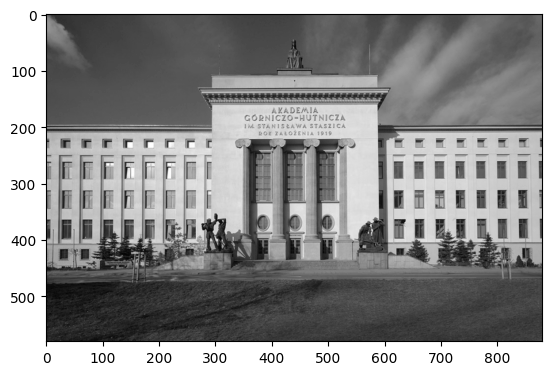

In [14]:
import cv2
from matplotlib import pyplot

image_bgr = cv2.imread("res/lab3_1.jpg")
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
pyplot.imshow(image, 'gray')

### b) Proszę sprawdzić i porównać wynik progowania ze statycznym ustalonym globalnie progiem zrealizowanego z użyciem każdego z dostępnych w OpenCV trybu progowania (cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO i cv2.THRESH_TOZERO_INV).

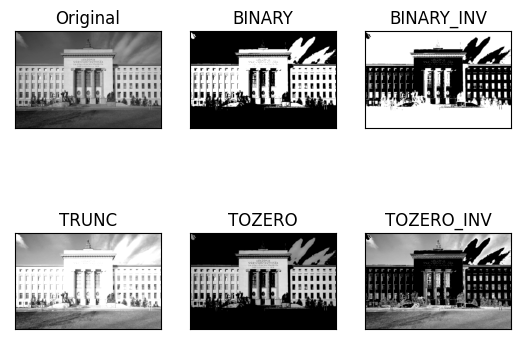

In [15]:
threshold: int = 127
max: int = 255
types : list[int] = [
    cv2.THRESH_BINARY,
    cv2.THRESH_BINARY_INV,
    cv2.THRESH_TRUNC,
    cv2.THRESH_TOZERO,
    cv2.THRESH_TOZERO_INV,
]
titles : list[str] = [
    "BINARY",
    "BINARY_INV",
    "TRUNC",
    "TOZERO",
    "TOZERO_INV"
]
blobs = zip(types, titles)

pyplot.subplot(2, 3, 1)
pyplot.imshow(image, 'gray')
pyplot.title("Original")
pyplot.xticks([])
pyplot.yticks([])
for i, blob in enumerate(blobs):
    type, title = blob
    ret, thresh = cv2.threshold(
        src=image,
        thresh=threshold,
        maxval=max,
        type=type,
    )
    pyplot.subplot(2, 3, i+2)
    pyplot.imshow(thresh, 'gray')
    pyplot.title(title)
    pyplot.xticks([])
    pyplot.yticks([])
pyplot.show()

### c) Proszę zastosować metody adaptacyjnego doboru progu.

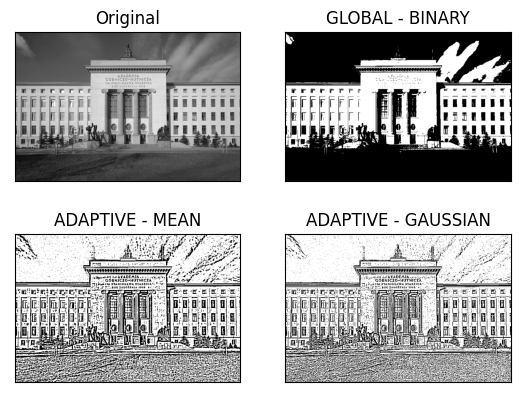

In [16]:
types: list[int] = [
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
]
titles: list[str] = [
    "ADAPTIVE - MEAN",
    "ADAPTIVE - GAUSSIAN",
]
blobs = zip(types, titles)

pyplot.subplot(2, 2, 1)
pyplot.imshow(image, "gray")
pyplot.title("Original")
pyplot.xticks([])
pyplot.yticks([])

ret, thresh_binary = cv2.threshold(src=image, thresh=threshold, maxval=max, type=cv2.THRESH_BINARY)
pyplot.subplot(2, 2, 2)
pyplot.imshow(thresh_binary, 'gray')
pyplot.title("GLOBAL - BINARY")
pyplot.xticks([])
pyplot.yticks([])
for i, blob in enumerate(blobs):
    type, title = blob
    thresh = cv2.adaptiveThreshold(
        src=image,
        maxValue=max,
        adaptiveMethod=type,
        thresholdType=cv2.THRESH_BINARY,
        blockSize=11,
        C=2,
    )
    pyplot.subplot(2, 2, i + 3)
    pyplot.imshow(thresh, "gray")
    pyplot.title(title)
    pyplot.xticks([])
    pyplot.yticks([])
pyplot.show()

**Jaki wpływ na wynik ma rozmiar sąsiedztwa?**

Rozmiar sąsiedztwa ma wpływ na dokładność progowania - przykładowo przy zbyt dużym sąsiedztwie, wynikowy obraz może stracić zbyt wiele szczegółów z obrazu oryginalnego.

**Która z metod daje lepsze rezultaty?**

Na obrazach powyżej widać, że próg gaussowski zachowuje więcej dronych szczegółów obrazu, niż próg średniej intensywności otoczenia.

### d) Proszę zastosować metodę Otsu, wykreślić histogram obrazu i zlokalizować na nim uzyskaną wartość progu.

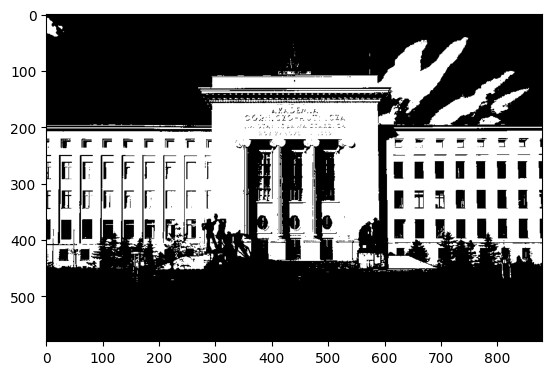

In [17]:
thresh_value, thresh_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
pyplot.imshow(thresh_otsu, 'gray')

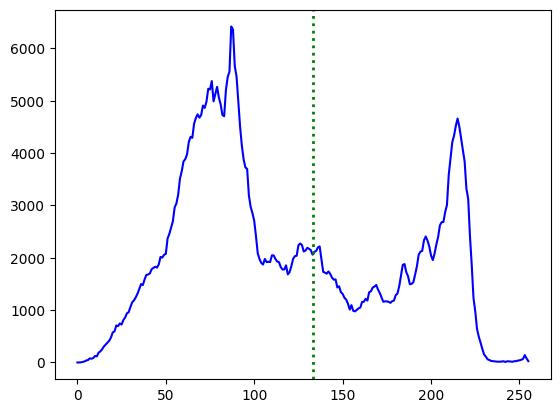

thresh_value=133.0


In [18]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
pyplot.plot(hist, color='b')
pyplot.axvline(x=thresh_value, color='g', linestyle='dotted', linewidth=2)
pyplot.show()
print(f"{thresh_value=}")

### e) Proszę wczytać drugi z obrazów i dokonać jego segmentacji z użyciem algorytmu k- średnich na 2, 4, 8 klastrów. Proszę zweryfikować wizualnie wynik klasteryzacji (kolor każdego piksela to kolor środka klastra do którego go przypisaliśmy) i sprawdzić czy kolory odpowiadają jakimś cechom zdjęcia które analizujemy. Uwaga: jeśli klasteryzacja zdjęcia trwa zbyt długo to proszę zmniejszyć jego rozmiar.

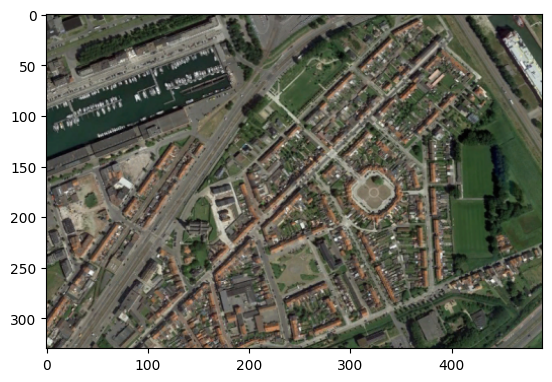

In [19]:
image2_bgr = cv2.imread("res/lab3_2.png")
image2 = cv2.cvtColor(image2_bgr, cv2.COLOR_BGR2RGB)
pyplot.imshow(image2)

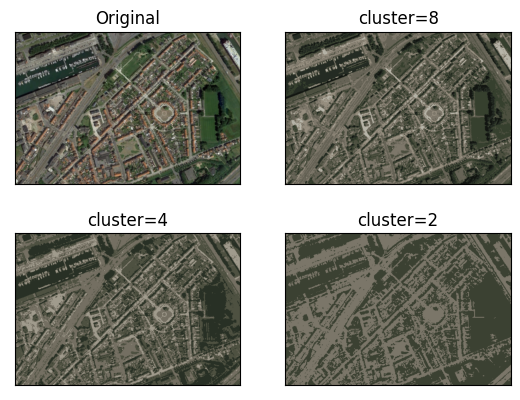

In [20]:
import numpy as np

dims = image2.reshape((-1, 3))
dims = np.float32(dims)
criteria = [cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0]
clusters = [8, 4, 2]

pyplot.subplot(2, 2, 1)
pyplot.imshow(image2)
pyplot.title("Original")
pyplot.xticks([])
pyplot.yticks([])
for i, cluster in enumerate(clusters):
    _, label, center = cv2.kmeans(dims, cluster, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape((image2.shape))
    pyplot.subplot(2, 2, i + 2)
    pyplot.imshow(res)
    pyplot.title(f"{cluster=}")
    pyplot.xticks([])
    pyplot.yticks([])

Kolory są faktycznie podobne do bazowych kolorów na zdjęciu oryginalnym.

### f) Proszę samodzielnie zaimplementować metodę Otsu.

In [21]:
def otsu(image, is_normalized=False):
    
    # Set total number of bins in the histogram
    bins_num = 256
    
    # Get the image histogram
    hist, bin_edges = np.histogram(image, bins=bins_num)
    
    # Get normalized histogram if it is required
    if is_normalized:
        hist = np.divide(hist.ravel(), hist.max())
    
    # Calculate centers of bins
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
    
    # Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]
    
    # Get the class means mu0(t)
    mean1 = np.cumsum(hist * bin_mids) / weight1
    # Get the class means mu1(t)
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
    
    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    
    # Maximize the inter_class_variance function val
    index_of_max_val = np.argmax(inter_class_variance)
    
    threshold = bin_mids[:-1][index_of_max_val]
    print(f"Otsu's algorithm implementation thresholding result: {threshold}")

image2_gray = cv2.cvtColor(image2_bgr, cv2.COLOR_BGR2GRAY)
otsu(image2_gray)
thresh_value, _ = cv2.threshold(image2_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(f"Otsu's cv2 built-in implementation thresholding result: {thresh_value}")

Otsu's algorithm implementation thresholding result: 89.998046875
Otsu's cv2 built-in implementation thresholding result: 90.0


**Czy otrzymany próg różni się od bibliotecznej implementacji? Jeśli tak to dlaczego?**

Próg bardzo nieznacznie różni się od bibliotecznej implementacji. Błąd ten jest na tyle nieznaczny, że może wynikać z niedokładności zapisu w pamięci liczb zmiennoprzecinkowych. Błąd ten może wynikać również z operacji na takich liczbach, na przykład dzieleniu.

## Laboratorium 4 - Filtracja obrazu

### a) Proszę wczytać przykładowy obraz (pierwszy z laboratorium 3)

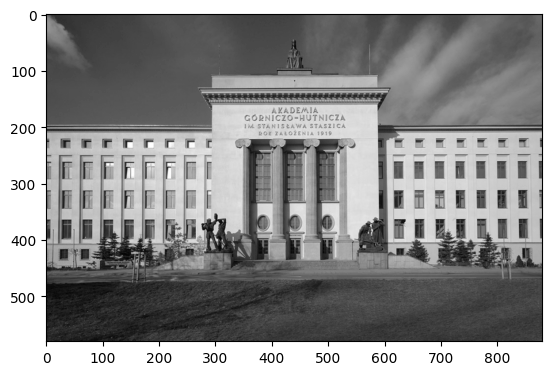

In [22]:
import cv2
from matplotlib import pyplot as plt

image_bgr = cv2.imread("res/lab3_1.jpg")
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")

### b) Proszę sprawdzić i porównać wynik następującej operacji: zmniejszania rozmiaru obrazu o 50 % - jedną z wybranych metod - a następnie zwiększenie o 50% z użyciem wszystkich dostępnych w OpenCV metod interpolacji. Proszę porównać uzyskany wynik z obrazem pierwotnym.

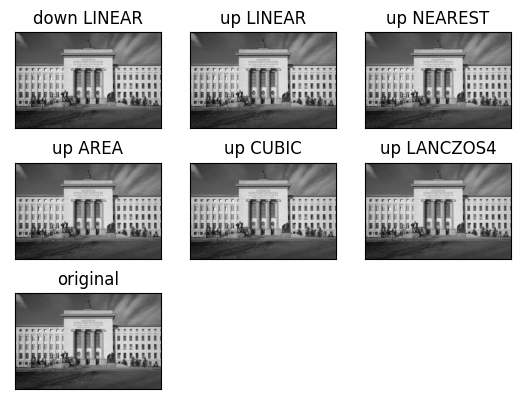

In [23]:
# b.1) zmniejszania rozmiaru obrazu o 50 % - jedną z wybranych metod
image_down = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

# b.2) a następnie zwiększenie o 50% z użyciem wszystkich dostępnych w OpenCV metod interpolacji.
image_up1 = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
image_up2 = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_NEAREST)
image_up3 = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_AREA)
image_up4 = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
image_up5 = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LANCZOS4)


# b.3) Proszę porównać uzyskany wynik z obrazem pierwotnym.
titles = [
    "down LINEAR",
    "up LINEAR",
    "up NEAREST",
    "up AREA",
    "up CUBIC",
    "up LANCZOS4",
    "original",
]
images = [image_down, image_up1, image_up2, image_up3, image_up4, image_up5, image]

for i in range(7):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

### c) Proszę nałożyć na obraz filtr uśredniający o macierzy K w rozmiarze 5x5, 10x10 i 15x15.

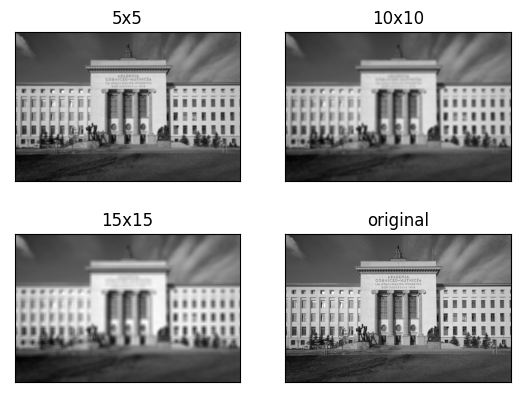

In [24]:
img1 = cv2.blur(image, (5, 5))
img2 = cv2.blur(image, (10, 10))
img3 = cv2.blur(image, (15, 15))

titles = ["5x5", "10x10", "15x15", "original"]
images = [img1, img2, img3, image]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

**Jaki efekt został zaobserwowany?**

Rozmycie / Blur.

### d) Proszę nałożyć na obraz filtr medianowy o rozmiarze 5x5, 11x11 i 15x15.

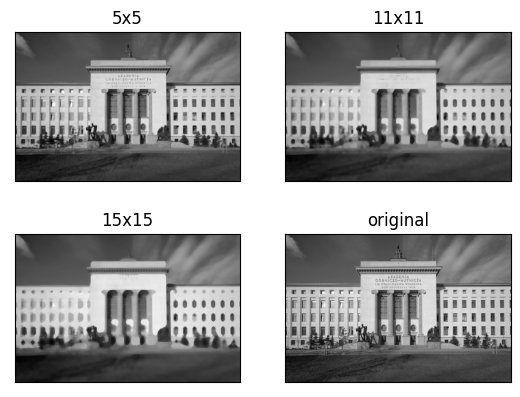

In [25]:
med_img1 = cv2.medianBlur(image, 5)
med_img2 = cv2.medianBlur(image, 11)
med_img3 = cv2.medianBlur(image, 15)

titles = ["5x5", "11x11", "15x15", "original"]
images = [med_img1, med_img2, med_img3, image]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

**Jaki efekt został zaobserwowany?**

Rozmycie, ale krawędzie pozostają wyraźne - "wygładzenie" szczegółów obrazu, usunięcie zakłóceń.

### e) Proszę nałożyć na obraz filtr gaussowski (o rozmiarze 5) i zaobserwować uzyskane wyniki.

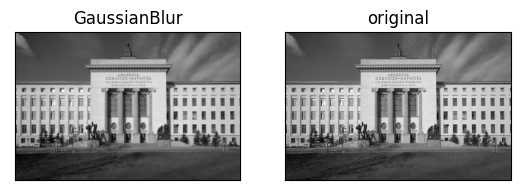

In [26]:
gauss_img = cv2.GaussianBlur(image, ksize=(5, 5), sigmaX=0)
titles = ["GaussianBlur", "original"]
images = [gauss_img, image]

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

Zaobserwowany efekt to rozmycie nieznacznie zmieniających się fragmentów obrazu, tworząc mniejsze rozmycie na krawędziach.

### f) Proszę zbinaryzować obraz po przefiltrowaniu go powyższymi metodami i porównać do binaryzacji bez filtracji.

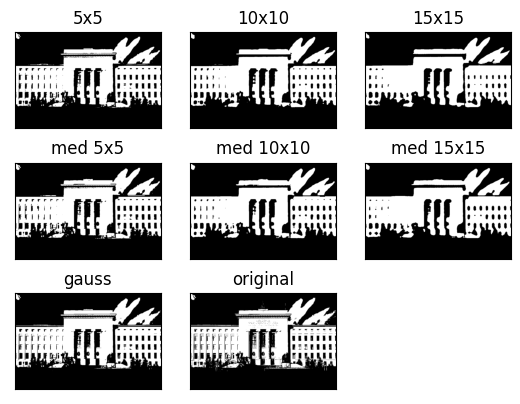

In [27]:
_, bin0 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
_, bin1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
_, bin2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)
_, bin3 = cv2.threshold(img3, 127, 255, cv2.THRESH_BINARY)
_, med_bin1 = cv2.threshold(med_img1, 127, 255, cv2.THRESH_BINARY)
_, med_bin2 = cv2.threshold(med_img2, 127, 255, cv2.THRESH_BINARY)
_, med_bin3 = cv2.threshold(med_img3, 127, 255, cv2.THRESH_BINARY)
_, gauss_bin = cv2.threshold(gauss_img, 127, 255, cv2.THRESH_BINARY)

titles = ["5x5", "10x10", "15x15", "med 5x5", "med 10x10", "med 15x15", "gauss", "original"]
images = [bin1, bin2, bin3, med_bin1, med_bin2, med_bin3, gauss_bin, bin0]

for i in range(8):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

Binaryzacja bez filtracji zachowuje więcej szczegółów, podczas gdy po filtracji obrazy zbinaryzowane zachowują wyraźnie jedynie kontury znajdujących się na nich obiektów. Przy czym porównując obrazy przefiltrowane i zbinaryzowane można dojść do wniosku, że filtr medianowy zatraca najwięcej informacji z pierwotnego obrazu.

### g) Proszę nałożyć na obraz filtry Roberts cross, Prewitta i Sobela.

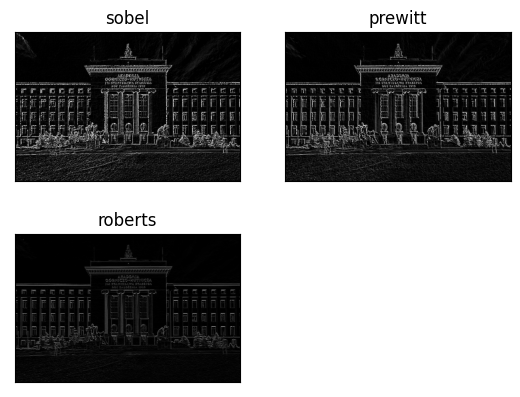

In [28]:
import numpy as np


def apply_filter_to_image(image: cv2.Mat, kernelx: np.ndarray, kernely: np.ndarray):
    imgx = cv2.filter2D(image, -1, kernelx)
    imgy = cv2.filter2D(image, -1, kernely)
    return imgx + imgy


roberts = apply_filter_to_image(
    image,
    np.array([[0, 1], [-1, 0]]),
    np.array([[1, 0], [0, -1]]),
)
prewitt = apply_filter_to_image(
    image,
    np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]),
    np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
)
sobel = apply_filter_to_image(
    image,
    np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),
    np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
)

titles = ["sobel", "prewitt", "roberts"]
images = [sobel, prewitt, roberts]

for i in range(3):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

Filtr Sobela, w porównaniu do filtru Prewitta oraz Robertsa, zachowuje najwięcej szczegółów z obrazu pierwotnego.